<a href="https://colab.research.google.com/github/drumalv/03MIAR---Algoritmos-de-Optimizazion/blob/main/Algoritmos_AG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 1 de Algoritmos de Optimizacion

Nombre : Álvaro Beltrán

Enlace : https://colab.research.google.com/drive/1dJClXjGO00H4cKpMDcJgw_b_on2s8wdA?usp=sharing

Github : https://github.com/drumalv/03MIAR---Algoritmos-de-Optimizazion


## Divide y vencerás. Torres de Hanoi

Vamos a dividir el problema en mover n-1 fichas desde la inicial al pivote y desde el pivote hasta la posición final. El **pivote** es el número que no es ni desde ni hasta es decir:
* desde = 1, hasta = 3 $\Rightarrow$ pivote = 2
* desde = 1, hasta = 3 $\Rightarrow$ pivote = 2

$\Rightarrow$ pivote = 6-desde-hasta


In [ ]:
"""
Torres de Hanoi - Divide y venceras

  N - nº de fichas
  desde - torre inicial
  hasta - torre final

"""
def Torres_Hanoi(N, desde, hasta):
  if N==1 :
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))
  else:
    Torres_Hanoi(N-1, desde, 6-desde-hasta)
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))
    Torres_Hanoi(N-1, 6-desde-hasta,  hasta)

In [ ]:
Torres_Hanoi(3, 1, 3)

Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 3


## Técnica Voraz. Cambio de monedas

In [ ]:
"""
Cambio de monedas - Técnica voraz

  cantidad - nº que deben sumar las monedas
  sistema - lista de monedas posibles (Ordenado decrecientemente)

"""
def cambio_monedas(cantidad,sistema):
  sol = {}
  ValorAcumulado = 0

  for valor in sistema:
    monedas = (cantidad-ValorAcumulado)//valor
    sol[valor] = monedas
    ValorAcumulado += monedas*valor

    if cantidad == ValorAcumulado:
      return sol

  print("No es posible encontrar solucion") 

In [ ]:
sistema = [12, 5 ,2, 1  ]
cambio_monedas(15,sistema)

{12: 1, 5: 0, 2: 1, 1: 1}

## Vuelta atrás. N reinas

In [ ]:
"""
Verifica que en la solución parcial no hay amenzas entre reinas
"""
def es_prometedora(SOLUCION,etapa):
################################################################
  #print(SOLUCION)
  #Si la solución tiene dos valores iguales no es valida => Dos reinas en la misma fila
  for i in range(etapa+1):
    #print("El valor " + str(SOLUCION[i]) + " está " +  str(SOLUCION.count(SOLUCION[i])) + " veces")
    if SOLUCION.count(SOLUCION[i]) > 1:       
      return False
  
    #Verifica las diagonales
    for j in range(i+1, etapa +1 ):
      #print("Comprobando diagonal de " + str(i) + " y " + str(j))
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]) : return False
  return True

"""
Traduce la solución al tablero
"""
def escribe_solucion(S):
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" X " , end="")
      else:
        print(" - ", end="")


"""
Proceso principal de N-Reinas
"""
def reinas(N, solucion=[],etapa=0): 

  if len(solucion) == 0:         # [0,0,0...]
    solucion = [0 for i in range(N) ]
  
  for i in range(1, N+1):
    solucion[etapa] = i
    if es_prometedora(solucion, etapa):
      if etapa == N-1:
        print(solucion)
      else:  
        reinas(N, solucion, etapa+1)
    else:
      None
  
  solucion[etapa] = 0

In [ ]:
reinas(8,solucion=[],etapa=0)

[1, 5, 8, 6, 3, 7, 2, 4]
[1, 6, 8, 3, 7, 4, 2, 5]
[1, 7, 4, 6, 8, 2, 5, 3]
[1, 7, 5, 8, 2, 4, 6, 3]
[2, 4, 6, 8, 3, 1, 7, 5]
[2, 5, 7, 1, 3, 8, 6, 4]
[2, 5, 7, 4, 1, 8, 6, 3]
[2, 6, 1, 7, 4, 8, 3, 5]
[2, 6, 8, 3, 1, 4, 7, 5]
[2, 7, 3, 6, 8, 5, 1, 4]
[2, 7, 5, 8, 1, 4, 6, 3]
[2, 8, 6, 1, 3, 5, 7, 4]
[3, 1, 7, 5, 8, 2, 4, 6]
[3, 5, 2, 8, 1, 7, 4, 6]
[3, 5, 2, 8, 6, 4, 7, 1]
[3, 5, 7, 1, 4, 2, 8, 6]
[3, 5, 8, 4, 1, 7, 2, 6]
[3, 6, 2, 5, 8, 1, 7, 4]
[3, 6, 2, 7, 1, 4, 8, 5]
[3, 6, 2, 7, 5, 1, 8, 4]
[3, 6, 4, 1, 8, 5, 7, 2]
[3, 6, 4, 2, 8, 5, 7, 1]
[3, 6, 8, 1, 4, 7, 5, 2]
[3, 6, 8, 1, 5, 7, 2, 4]
[3, 6, 8, 2, 4, 1, 7, 5]
[3, 7, 2, 8, 5, 1, 4, 6]
[3, 7, 2, 8, 6, 4, 1, 5]
[3, 8, 4, 7, 1, 6, 2, 5]
[4, 1, 5, 8, 2, 7, 3, 6]
[4, 1, 5, 8, 6, 3, 7, 2]
[4, 2, 5, 8, 6, 1, 3, 7]
[4, 2, 7, 3, 6, 8, 1, 5]
[4, 2, 7, 3, 6, 8, 5, 1]
[4, 2, 7, 5, 1, 8, 6, 3]
[4, 2, 8, 5, 7, 1, 3, 6]
[4, 2, 8, 6, 1, 3, 5, 7]
[4, 6, 1, 5, 2, 8, 3, 7]
[4, 6, 8, 2, 7, 1, 3, 5]
[4, 6, 8, 3, 1, 7, 5, 2]
[4, 7, 1, 8, 5, 2, 6, 3]


## Encontrar los dos puntos más cercanos

Dado un conjunto de puntos se trata de encontrar los dos puntos más cercanos.

In [ ]:
import matplotlib.pyplot as plt
import math as m
import random

In [ ]:
"""
Función distancia euclidea: usaré la función dist de math
"""
a = (1, 2, 3)
b = (4, 5, 6)

print(m.dist(a,b))

5.196152422706632


In [ ]:
"""
Función para pintar puntos 1D y 2D
"""
def pinta_solucion(lista_puntos,sol):

  if len(lista_puntos[0]) == 1:
    yVals = np.zeros(len(lista_puntos))
    xVals = np.array(lista_puntos)
  else:
    yVals = np.array(lista_puntos)[:,1]
    xVals = np.array(lista_puntos)[:,0]

  color = ['#1f77b4']*len(lista_puntos)
  color[sol[0]] = '#2ca02c'
  color[sol[1]] = '#2ca02c'
  plt.scatter(x=xVals,y=yVals,c=color)
  plt.show()

In [ ]:
"""
Función para pintar puntos 3D
"""
def pinta_solucion_3D(lista_puntos,sol):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ys = np.array(lista_puntos)[:,1]
  xs = np.array(lista_puntos)[:,0]
  zs = np.array(lista_puntos)[:,2]
  color = ['#1f77b4']*len(lista_puntos)
  color[sol[0]] = '#2ca02c'
  color[sol[1]] = '#2ca02c'
  ax.scatter(xs, ys, zs,c=color)
  plt.show()

### Algoritmo de fuerza bruta

In [ ]:
import numpy as np

Se debe resolver para 1D, 2D y 3D. En este caso lo resolveré para n-dimensiones pero solo mostraré soluciones para 1D, 2D y 3D.

In [ ]:
def conjunto_puntos_FB(lista_puntos):
  minDistancia = m.inf
  pareja = (-1,-1)
  for i in range(len(lista_puntos)):
    v_i = lista_puntos[i]
    # la distancia de i a j es la misma que de j a i
    for j in range(i+1,len(lista_puntos)):
      distancia = m.dist(v_i,lista_puntos[j])
      if distancia < minDistancia:
        pareja = (i, j)
        minDistancia = distancia
  return pareja, minDistancia

La complejidad de este algoritmo es $\frac{n(n-1)}{2}$ por lo que el algoritmo es $O(n^2)$

In [ ]:
lista_1D = [[random.randrange(1,10000)] for x in range(10)]
print(lista_1D)
sol, minDistancia = conjunto_puntos_FB(lista_1D)
print(f'Solución: {sol}')

[[1343], [1193], [6376], [7321], [9922], [2529], [7067], [7908], [7188], [2766]]
Solución: (6, 8)


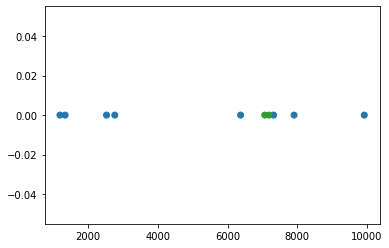

In [ ]:
pinta_solucion(lista_1D,sol)

In [ ]:
lista_2D = [[random.randrange(1,10000),random.randrange(1,10000)] for x in range(10)]
print(lista_2D)
sol, minDistancia = conjunto_puntos_FB(lista_2D)
print(f'Solución: {sol}')

[[3500, 1853], [8173, 3099], [9581, 8555], [9509, 8930], [7589, 4005], [1943, 4516], [1525, 8607], [7213, 5314], [2190, 3101], [4793, 1294]]
Solución: (2, 3)


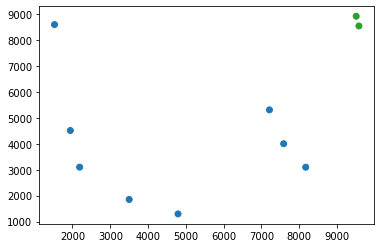

In [ ]:
pinta_solucion(lista_2D,sol)

In [ ]:
lista_3D = [[random.randrange(1,10000),random.randrange(1,10000),random.randrange(1,10000)] for x in range(10)]
print(lista_3D)
sol, minDistancia = conjunto_puntos_FB(lista_3D)
print(f'Solución: {sol}')

[[4634, 4680, 4334], [2078, 2145, 4387], [2214, 1162, 7640], [5146, 338, 807], [7725, 4200, 7175], [8929, 8963, 6403], [668, 27, 3207], [8671, 2364, 5524], [5800, 4081, 1572], [5021, 8163, 9403]]
Solución: (4, 7)


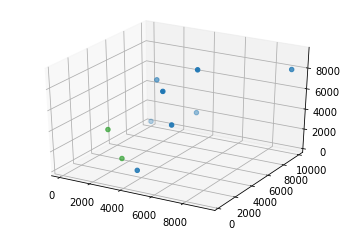

In [ ]:
pinta_solucion_3D(lista_3D,sol)

### Divide y vencerás


Para este problema se divide el problema en dos mitades según el espacio de puntos, buscamos el punto medio de la lista de puntos y dividimos el problema en la lista de puntos de la derecha del punto medio y de la izquierda del punto medio.

Luego, hay que comprobar las distancias en el entorno del punto medio porque puede ser que la distancia mínima se quede entre los puntos de las dos mitades.

http://www.algoritmia.net/articles.php?id=34

La complejidad de este algoritmo es $T(n)=2T(n/2)+n$ por lo que el algoritmo es $O(nlog(n))$

In [ ]:
def conjunto_puntos_FB_dmin(lista_puntos,d_min,desde,hasta):
  minDistancia = d_min
  pareja = (-1,-1)
  for i in range(desde,hasta+1):
    v_i = lista_puntos[i]
    # la distancia de i a j es la misma que de j a i
    for j in range(i+1,hasta+1):
      distancia = m.dist(v_i,lista_puntos[j])
      if distancia < minDistancia:
        pareja = (i, j)
        minDistancia = distancia
  return pareja, minDistancia


"""
Lista de puntos: ordenada en la x
desde el inicio del array
hasta índice último
"""
def conjunto_puntos_DV(lista_puntos, desde, hasta):

  if(hasta-desde<=3):
    return conjunto_puntos_FB_dmin(lista_puntos, m.inf, desde, hasta )
  else:  
    punto_medio = (hasta+desde)//2
    #mitad 1
    pareja_i, minDistancia_i = conjunto_puntos_DV(lista_puntos,desde,punto_medio)
    #mitad 2
    pareja_d, minDistancia_d = conjunto_puntos_DV(lista_puntos,punto_medio,hasta)

    if minDistancia_i <= minDistancia_d:
      pareja_min = pareja_i
      d_min = minDistancia_i
    else:
      pareja_min = pareja_d
      d_min = minDistancia_d

    strip = []
    for i in range(desde,hasta+1):
        if m.dist(lista_puntos[i],lista_puntos[punto_medio]) < d_min:
            strip.append(lista_puntos[i])
    
    pareja, minDistancia = conjunto_puntos_FB_dmin(strip,d_min,0,len(strip)-1)

    if pareja == (-1,-1):
      return pareja_min, d_min
    else:
      return pareja, minDistancia

In [ ]:
print(sorted(lista_1D))
sol, minDistancia = conjunto_puntos_DV(sorted(lista_1D),0,len(lista_1D)-1)
print(f'Solución: {sol} y {minDistancia}')

[[1193], [1343], [2529], [2766], [6376], [7067], [7188], [7321], [7908], [9922]]
Solución: (5, 6) y 121.0


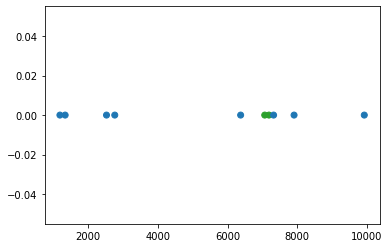

In [ ]:
pinta_solucion(sorted(lista_1D),sol)

In [ ]:
print(sorted(lista_2D))
sol, minDistancia = conjunto_puntos_DV(sorted(lista_2D),0,len(lista_2D)-1)
print(f'Solución: {sol} y {minDistancia}')

[[1525, 8607], [1943, 4516], [2190, 3101], [3500, 1853], [4793, 1294], [7213, 5314], [7589, 4005], [8173, 3099], [9509, 8930], [9581, 8555]]
Solución: (8, 9) y 381.849446771892


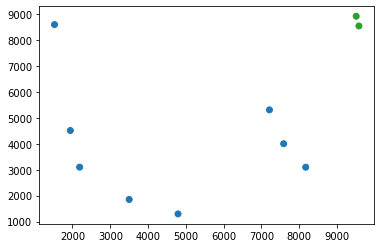

In [ ]:
pinta_solucion(sorted(lista_2D),sol)

In [ ]:
print(sorted(lista_3D))
sol, minDistancia = conjunto_puntos_DV(sorted(lista_3D),0,len(lista_3D)-1)
print(f'Solución: {sol} y {minDistancia}')

[[568, 48, 2279], [1078, 6331, 2725], [2337, 2205, 9398], [5233, 8375, 3006], [6106, 2042, 9915], [7127, 9543, 7290], [8135, 7203, 769], [8187, 4237, 4416], [8676, 9592, 127], [8907, 1833, 3185]]
Solución: (6, 8) y 2532.2255033863003


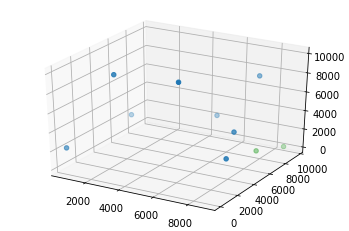

In [ ]:
pinta_solucion_3D(sorted(lista_3D),sol)